# Лабораторна робота 3. Розвідувальний аналіз даних

**Виконала:** студентка 2 курсу бакалаврату кафедри комп'ютерної інженерії ***Кузьмичова Олена Іванівна***

**Дата виконання:** 6 жовтня 2025 року

**Мета роботи:**
- Опанувати методи розвідувального аналізу даних (EDA) за допомогою бібліотеки **pandas** на загальнодоступних наборах даних;
- Ознайомитись з принципами побудови графіків за допомогою бібліотеки **seaborn**;


## Хід роботи

##Завантаження та первинний аналіз даних

### Завдання 2

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/Telco_Customer_Churn.csv'

In [ ]:
with open(file_path, 'r', encoding='utf-8') as f:
  sample = f.read(2048)

possible_znak = [',', ';', '\t', ':']

for d in possible_znak:
  if sample.count(d) > 0:
    print(f"Роздільник: '{d}' - зустрічається {sample.count(d)} разів у перших 2048 символах")

Роздільник: ',' - зустрічається 308 разів у перших 2048 символах


In [ ]:
df = pd.read_csv(file_path, sep=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Завдання 3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##Аналіз категоріальних ознак

##Завдання 4

In [ ]:
#унікальні значення ознаки InternetService
unique_values = df['InternetService'].unique()
print("Унікальні значення InternetService:")
print(unique_values)


Унікальні значення InternetService:
['DSL' 'Fiber optic' 'No']


In [ ]:
#частоти появи кожного значення
value_counts = df['InternetService'].value_counts()
print("\nЧастоти появи значень InternetService:")
print(value_counts)



Частоти появи значень InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


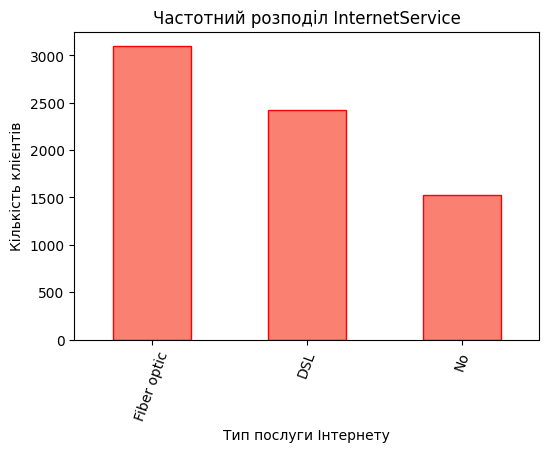

In [ ]:
plt.figure(figsize=(6,4))
value_counts.plot.bar(color='salmon', edgecolor='red')
plt.title('Частотний розподіл InternetService')
plt.xlabel('Тип послуги Інтернету')
plt.ylabel('Кількість клієнтів')
plt.xticks(rotation=70)
plt.show()

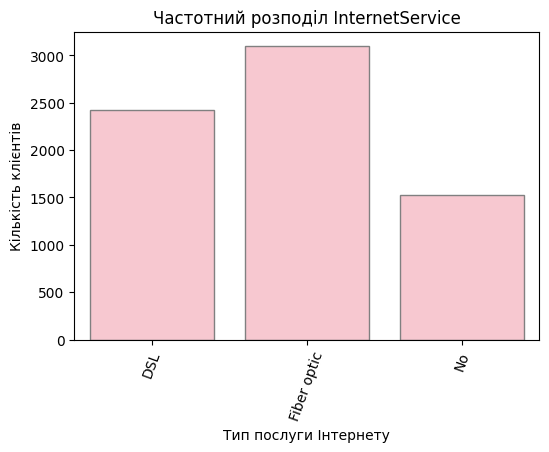

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', data=df, color='pink', edgecolor='gray')
plt.title('Частотний розподіл InternetService')
plt.xlabel('Тип послуги Інтернету')
plt.ylabel('Кількість клієнтів')
plt.xticks(rotation=70)
plt.show()

##Завдання 5

In [ ]:
unique_churn = df['Churn'].unique()
print("Унікальні значення Churn:")
print(unique_churn)

churn_counts = df['Churn'].value_counts()
print("\nКількість клієнтів за значеннями Churn:")
print(churn_counts)

if 'Yes' in churn_counts.index:
    print(f"\nКількість клієнтів, які припинили користування послугами компанії: {churn_counts['Yes']}")
else:
    print("\nНе знайдено значення 'Yes' у стовпці Churn — перевірте, як воно записане у вашому файлі.")



Унікальні значення Churn:
['No' 'Yes']

Кількість клієнтів за значеннями Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Кількість клієнтів, які припинили користування послугами компанії: 1869


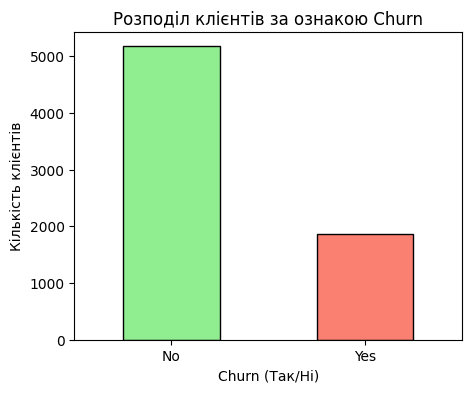

In [ ]:
plt.figure(figsize=(5,4))
churn_counts.plot.bar(color=['lightgreen', 'salmon'], edgecolor='black')
plt.title('Розподіл клієнтів за ознакою Churn')
plt.xlabel('Churn (Так/Ні)')
plt.ylabel('Кількість клієнтів')
plt.xticks(rotation=0)
plt.show()


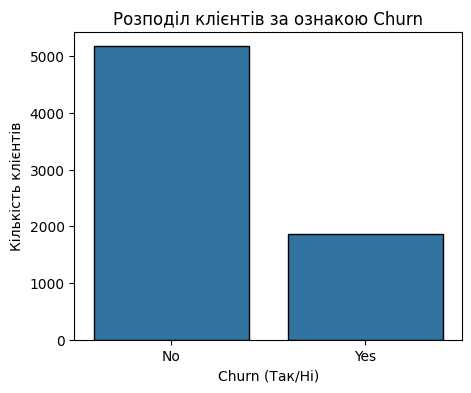

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, edgecolor='black')
plt.title('Розподіл клієнтів за ознакою Churn')
plt.xlabel('Churn (Так/Ні)')
plt.ylabel('Кількість клієнтів')
plt.show()

##Завдання 6

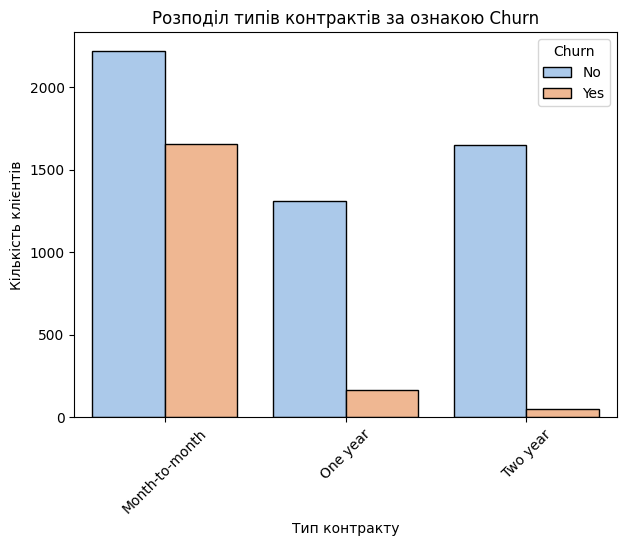

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='pastel', edgecolor='black')
plt.title('Розподіл типів контрактів за ознакою Churn')
plt.xlabel('Тип контракту')
plt.ylabel('Кількість клієнтів')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()



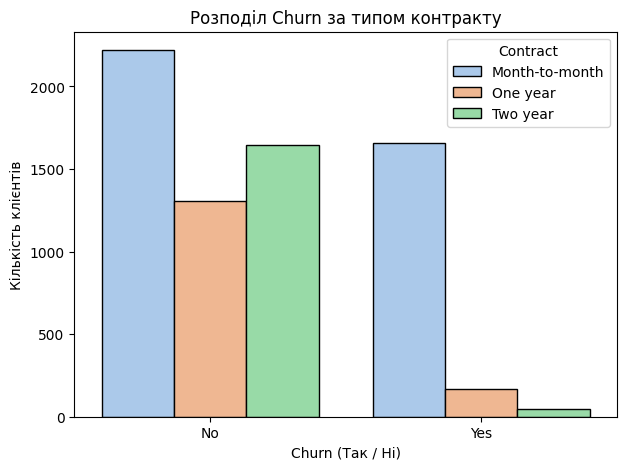

In [ ]:
# x ↔ hue
plt.figure(figsize=(7,5))
sns.countplot(x='Churn', hue='Contract', data=df, palette='pastel', edgecolor='black')
plt.title('Розподіл Churn за типом контракту')
plt.xlabel('Churn (Так / Ні)')
plt.ylabel('Кількість клієнтів')
plt.legend(title='Contract', loc='upper right')
plt.show()

##Аналіз кількісних ознак

##Завдання 7

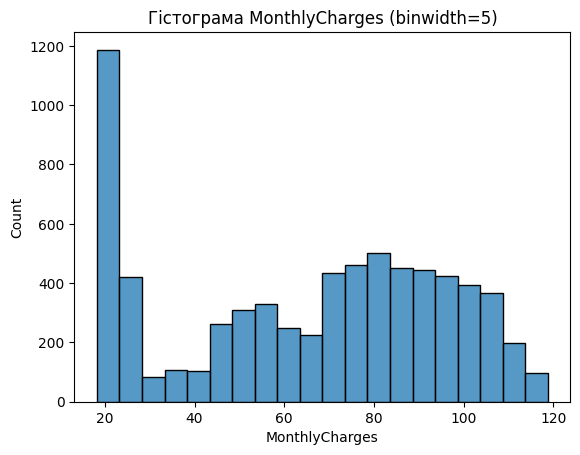

In [ ]:
sns.histplot(data=df, x="MonthlyCharges", binwidth=5)
plt.title("Гістограма MonthlyCharges (binwidth=5)")
plt.show()

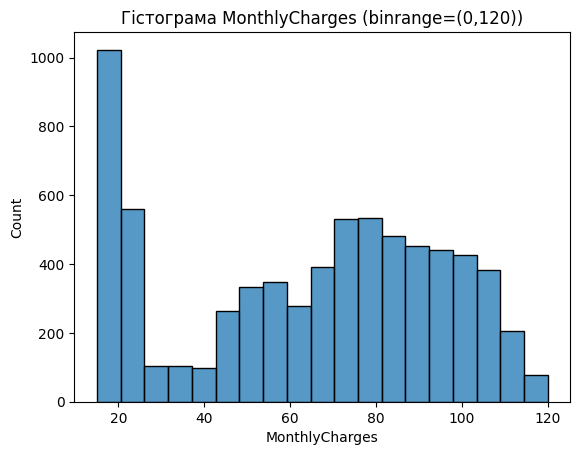

In [ ]:
#Налаштування binrange
sns.histplot(data=df, x="MonthlyCharges", binrange=(15, 120))
plt.title("Гістограма MonthlyCharges (binrange=(0,120))")
plt.show()

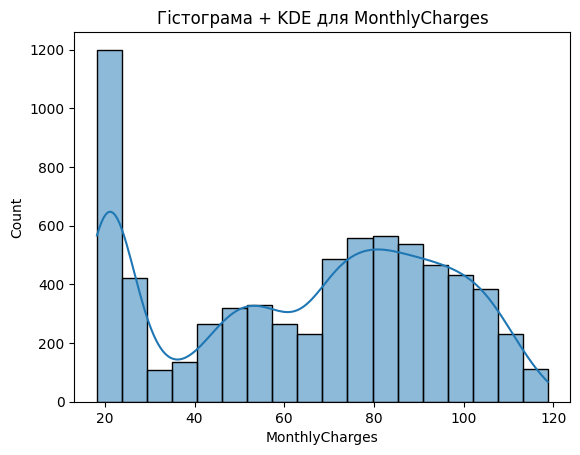

In [ ]:
#Додавання KDE (оцінки густини ймовірності)
sns.histplot(data=df, x="MonthlyCharges", kde=True)
plt.title("Гістограма + KDE для MonthlyCharges")
plt.show()

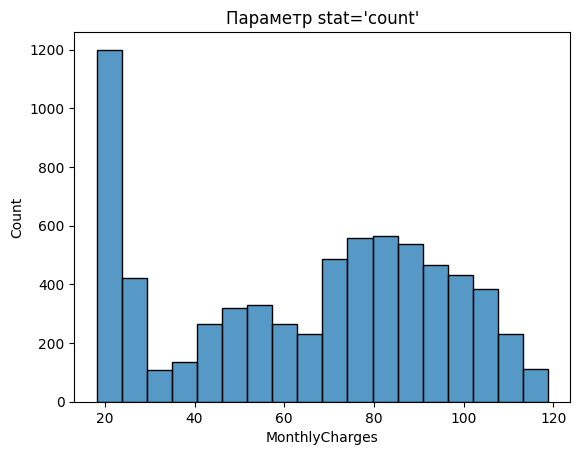

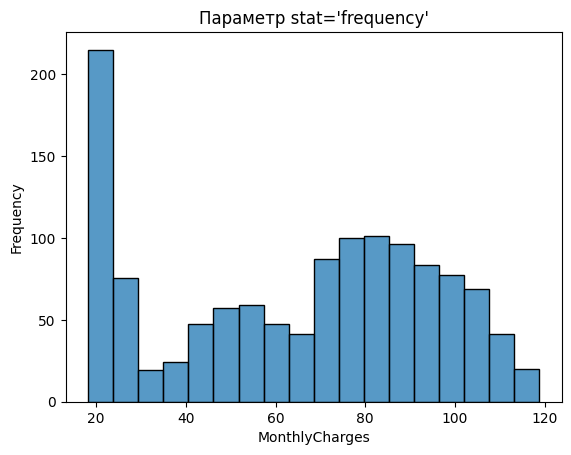

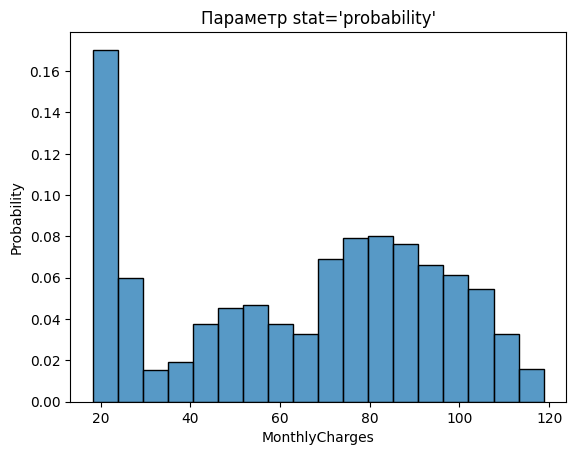

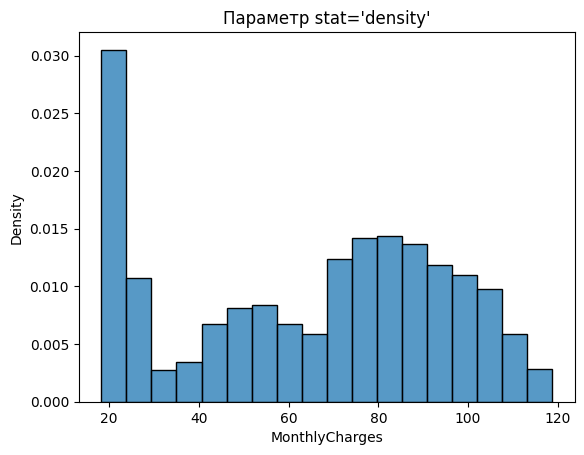

In [ ]:
#порівняння параметрiв stat
for s in ['count', 'frequency', 'probability', 'density']:
    sns.histplot(data=df, x="MonthlyCharges", stat=s)
    plt.title(f"Параметр stat='{s}'")
    plt.show()

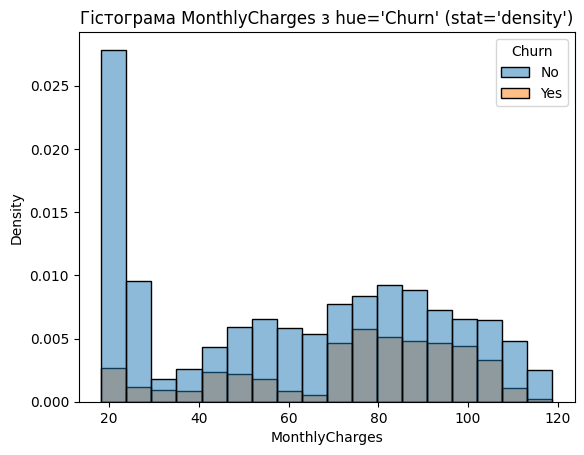

In [ ]:
#hue='Churn'
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", stat='density')
plt.title("Гістограма MonthlyCharges з hue='Churn' (stat='density')")
plt.show()

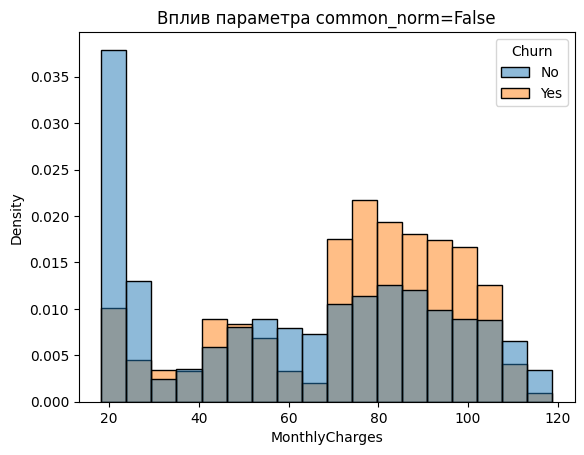

In [ ]:
#common_norm
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", stat='density', common_norm=False)
plt.title("Вплив параметра common_norm=False")
plt.show()

##Завдання 8

In [ ]:
print(df["InternetService"].value_counts())

p_churn_given_fiber = len(df[(df["InternetService"] == "Fiber optic") & (df["Churn"] == "Yes")]) / \
                      len(df[df["InternetService"] == "Fiber optic"])
print(f"Ймовірність, що клієнт із Fiber optic припинив користування: {p_churn_given_fiber:.3f}")

p_fiber_given_churn = len(df[(df["Churn"] == "Yes") & (df["InternetService"] == "Fiber optic")]) / \
                      len(df[df["Churn"] == "Yes"])
print(f"Ймовірність, що клієнт, який припинив користування, мав Fiber optic: {p_fiber_given_churn:.3f}")

p_fiber_and_churn = len(df[(df["InternetService"] == "Fiber optic") & (df["Churn"] == "Yes")]) / len(df)
print(f"Ймовірність, що клієнт одночасно припинив користування і мав Fiber optic: {p_fiber_and_churn:.3f}")


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Ймовірність, що клієнт із Fiber optic припинив користування: 0.419
Ймовірність, що клієнт, який припинив користування, мав Fiber optic: 0.694
Ймовірність, що клієнт одночасно припинив користування і мав Fiber optic: 0.184


##Завдання 9

In [ ]:
churn_prob_by_payment = (
    df.groupby("PaymentMethod")["Churn"]
    .apply(lambda x: (x == "Yes").mean())
    .sort_values()
)

print("Ймовірність припинення користування послугами для кожного способу оплати:")
print(churn_prob_by_payment)

max_payment = churn_prob_by_payment.idxmax()
max_value = churn_prob_by_payment.max()
print(f"\nНайвища ймовірність: {max_value:.3f} для способу оплати '{max_payment}'")


Ймовірність припинення користування послугами для кожного способу оплати:
PaymentMethod
Credit card (automatic)      0.152431
Bank transfer (automatic)    0.167098
Mailed check                 0.191067
Electronic check             0.452854
Name: Churn, dtype: float64

Найвища ймовірність: 0.453 для способу оплати 'Electronic check'


##Аналіз взаємозв'язків

##Завдання 10

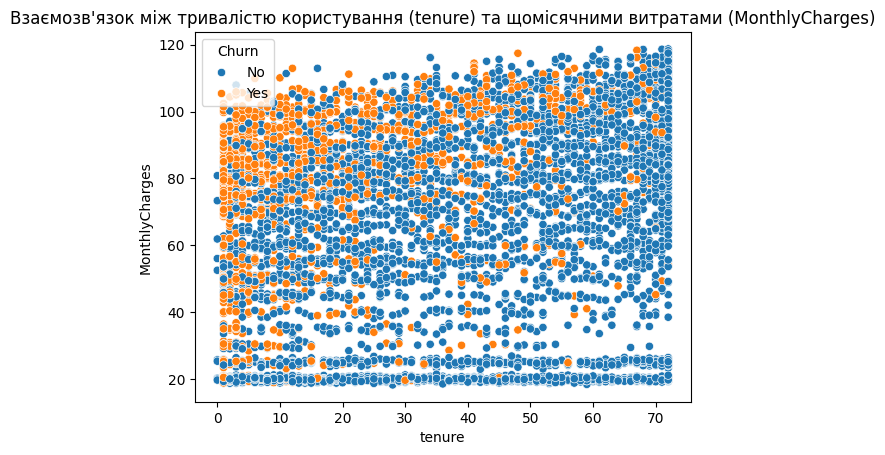

In [ ]:
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Взаємозв'язок між тривалістю користування (tenure) та щомісячними витратами (MonthlyCharges)")
plt.show()


##Завдання 11

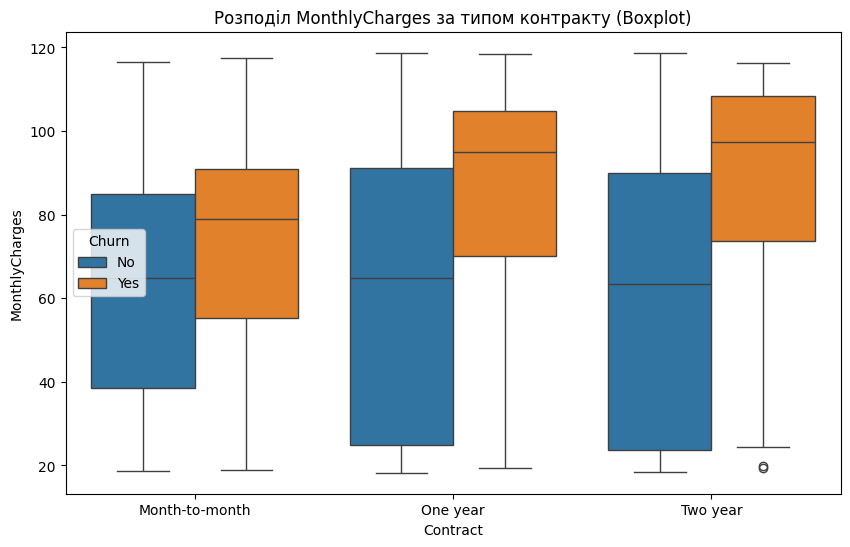

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Розподіл MonthlyCharges за типом контракту (Boxplot)')
plt.show()

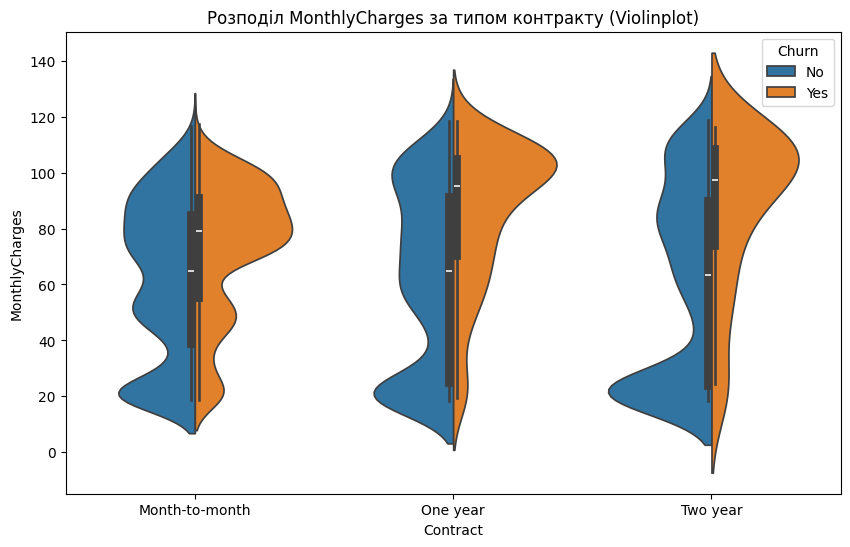

In [ ]:
#з відображенням густини (KDE)
plt.figure(figsize=(10,6))
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, split=True)
plt.title('Розподіл MonthlyCharges за типом контракту (Violinplot)')
plt.show()
